In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump
from custom_libs import plotting

In [2]:
df = db.get_dataset("chat_dataset")
df.head(2)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative


In [3]:
x_column_name = "message"
x_column_cleaned_name = x_column_name + "_clean"

In [4]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, x_column_cleaned_name, proprocessing_function)
df.head(2)

,message,sentiment,message_clean
0,I really enjoyed the movie,positive,really enjoy movie
1,The food was terrible,negative,food terrible


In [5]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

,message,sentiment,message_clean
541,I had the best sushi for lunch today at this r...,Positive,best sushi lunch today restaurant http www sus...
489,I'm feeling so down today... ð,Negative,feel today
457,I'm so proud of my accomplishments this year ð,Positive,proud accomplishment year
104,The scenery here is breathtaking,Positive,scenery breathtaking
171,I'm dissatisfied with this product,Negative,dissatisfied product


In [6]:
# classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
# df.head(3)

In [7]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]

results_accuracies = classification.test_classifiers(models, vectorizers, x_train, x_test, y_train, y_test)

labels_vectorizers = ['CountVectorizer', 'TfidfVectorizer', 'TfidfVectorizer \nmax freq. = 0.8', 
                      'TfidfVectorizer \nmax freq. = 0.8 \nbigram', 'TfidfVectorizer \nmax freq. = 0.8 \ntrigram']

plotting.plot_accuracies(results_accuracies, labels_vectorizers)



TypeError: 'PassiveAggressiveClassifier' object is not callable

[0.78723404 0.72340426 0.82978723 0.89361702 0.80851064 0.76595745
 0.78723404 0.7173913  0.76086957 0.82608696]


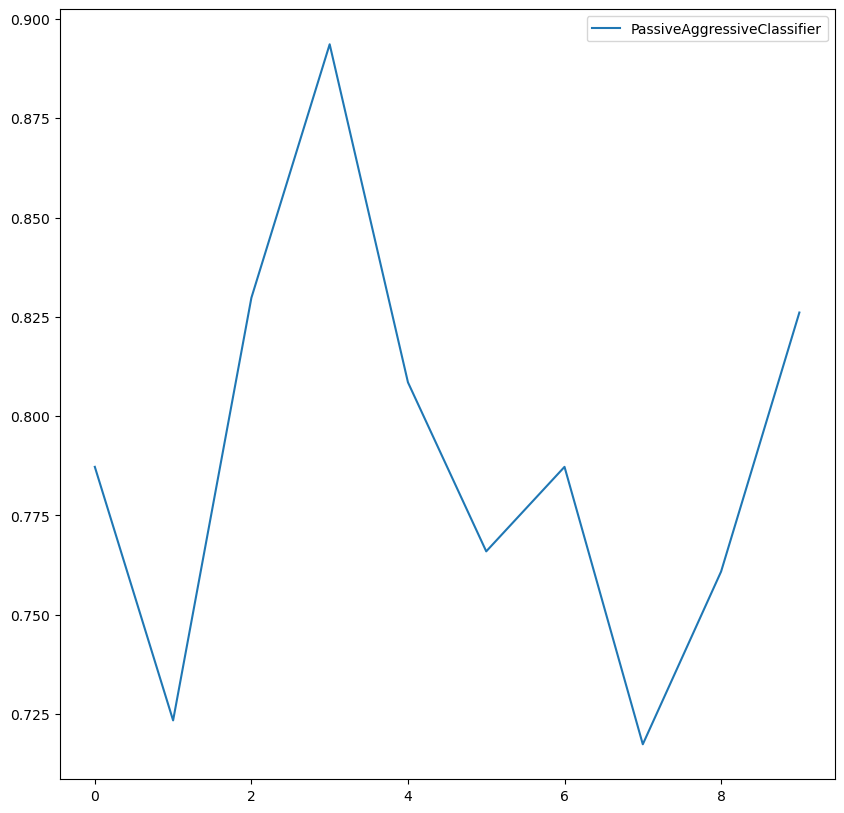

In [15]:
print(scores)
import matplotlib.pyplot as plt
#plot cross validation scores
plt.figure(figsize=(10, 10))
plt.plot(scores, label="PassiveAggressiveClassifier")
plt.legend()

Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.63      0.72        30
     Neutral       0.79      0.93      0.85        54
    Positive       0.87      0.82      0.84        33

    accuracy                           0.82       117
   macro avg       0.83      0.79      0.81       117
weighted avg       0.82      0.82      0.82       117

Confusion matrix, without normalization


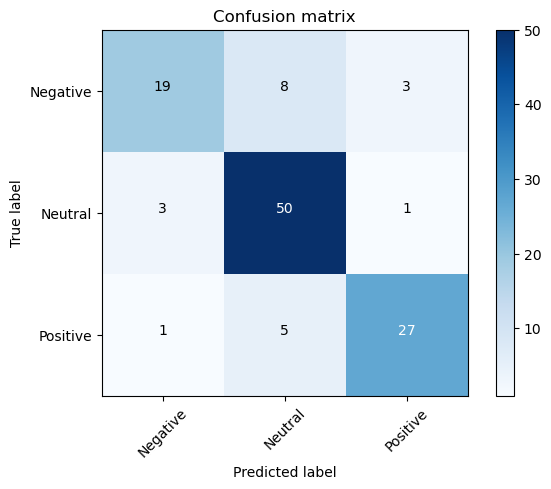

In [ ]:
# Best combination of model and vectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(LogisticRegression, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [ ]:
dump.save_model(model, "model_chat")
dump.save_vectorizer(vectorizer, "vectorizer_chat")

Saving model at: dump_models/model_chat.pkl
Saving vectorizer at: dump_models/vectorizer_chat.pkl
